## 1. Import Libraries and Data
Dataset: [Life Expectancy](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv)

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns

from pycaret.classification import *

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('./Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.isna().sum()[df.isna().sum()>0]

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# Fix columns Life ecpectancy
df.columns = ['Country', 'Year', 'Status', 'LifeExpectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [7]:
df.corr(numeric_only=True)['LifeExpectancy'].nlargest(15)

LifeExpectancy                     1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
Name: LifeExpectancy, dtype: float64

In [8]:
# Drop Country since it can have strong correllation with Life Expectancy
df = df.drop(columns='Country', axis=1, inplace=False)
df['Status'].replace(['Developing', 'Developed'], [0, 1], inplace=True)
df.head()

,Year,Status,LifeExpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
df = df.drop(df[df['LifeExpectancy'].isna()].index)
df.shape

(2928, 21)

In [10]:
df['Year'].value_counts()

2015    183
2014    183
2013    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64

In [11]:
df['Status'].value_counts()

0    2416
1     512
Name: Status, dtype: int64

## 2. Set aside "unseen" data
This will be used after creating the model to simulate the model's effectiveness on new data

In [12]:
data = df.sample(frac=0.95, random_state=28)
data_unseen = df.drop(data.index)
print(f'Data for model: {data.shape},\nData for unseen predictions: {data_unseen.shape}')

Data for model: (2782, 21),
Data for unseen predictions: (146, 21)


## 3. Setup and Compare Models

In [13]:
from pycaret.regression import *
s = setup(data, target = 'LifeExpectancy',normalize=True )

,Description,Value
0,Session id,4676
1,Target,LifeExpectancy
2,Target type,Regression
3,Original data shape,"(2782, 21)"
4,Transformed data shape,"(2782, 21)"
5,Transformed train set shape,"(1947, 21)"
6,Transformed test set shape,"(835, 21)"
7,Numeric features,20
8,Rows with missing values,43.8%
9,Preprocess,True


In [15]:
s.dataset_transformed

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,LifeExpectancy
912,-1.410185,-0.448453,0.426294,-0.281317,-0.677893,-0.349140,7.526093e-01,-0.199352,0.652245,-0.284567,0.414381,-1.088970,0.375643,-0.332041,-5.305517e-01,-0.257956,-0.124584,-0.194563,0.278304,3.826353e-01,67.800003
2015,-0.112117,-0.448453,-0.277166,-0.175234,-0.069749,-0.103513,5.273540e-01,-0.200890,-1.670242,-0.179209,0.456854,-0.534236,0.458966,-0.293948,-2.776632e-01,0.359317,-0.833852,-0.820948,0.343111,3.826353e-01,74.000000
1083,-0.328462,-0.448453,1.193704,0.017643,-1.134001,-0.354258,-6.402139e-16,-0.200529,-0.973496,0.059604,-1.242068,-1.122590,-1.040851,0.144127,-5.262179e-01,-0.054272,0.973637,0.946353,-1.351849,-1.516102e+00,55.599998
2270,0.536917,-0.448453,-0.317135,-0.271673,1.311460,0.024350,3.471498e-01,-0.199081,0.945080,-0.277543,0.371908,-1.668919,0.375643,-0.332041,-1.426326e-01,-0.112453,-0.605056,-0.574868,0.637236,5.071429e-01,74.400002
1902,-0.328462,-0.448453,1.825219,5.013172,1.314037,-0.354271,-2.446015e+00,-0.137200,-0.928056,5.889443,-1.539379,-0.929274,-3.248916,0.658389,-5.394865e-01,0.044122,1.774424,1.729335,-0.803480,-9.246923e-01,49.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,-0.977496,-0.448453,-0.884699,0.007999,-0.126440,-0.340269,-6.402139e-16,-0.147875,-1.003789,0.045556,-0.689918,2.445359,-0.374266,0.010800,-5.286867e-01,-0.159445,1.110915,1.102950,-1.521345,-1.422722e+00,41.500000
1838,-0.328462,2.229886,-0.772785,-0.271673,1.347536,3.775255,-6.402139e-16,-0.200800,0.919836,-0.277543,0.584273,1.466169,0.583950,-0.332041,2.785110e+00,-0.239527,-0.879611,-0.865690,1.325191,1.409821e+00,79.800003
2115,-0.977496,-0.448453,0.466263,-0.271673,0.924927,-0.359403,7.976603e-01,-0.193020,0.470485,-0.277543,0.669219,0.995486,0.667274,-0.332041,6.820246e-17,0.000000,-0.353380,-0.306418,0.000000,-5.529239e-16,67.599998
190,-1.410185,-0.448453,-1.268404,-0.281317,-0.672739,0.210657,7.976603e-01,-0.200438,0.834005,-0.284567,0.711692,-0.870438,0.708935,-0.332041,4.165133e-01,0.000000,0.310129,0.252855,0.831658,4.137623e-01,74.699997


In [17]:
compare_models(include=['et','catboost','lightgbm','rf','xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0077,2.9638,1.7061,0.9671,0.0262,0.0153,6.3730
catboost,CatBoost Regressor,1.2025,3.3902,1.8299,0.9622,0.0279,0.0181,6.6420
lightgbm,Light Gradient Boosting Machine,1.2507,3.5633,1.8810,0.9601,0.0285,0.0187,4.9370
xgboost,Extreme Gradient Boosting,1.3042,3.6964,1.9176,0.9583,0.0294,0.0197,4.7140
rf,Random Forest Regressor,1.2443,3.8083,1.9351,0.9575,0.0295,0.0188,5.6550


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=4340)

In [11]:
# look at the available models for this module
#models()
# len(models())

## 4. Create model
### Model created using cross-validation against the 'training' set

In [14]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1909,4.2521,2.0621,0.9468,0.0316,0.0177
1,1.1684,3.5818,1.8926,0.9607,0.0289,0.0180
2,1.0512,3.0009,1.7323,0.9694,0.0259,0.0157
3,0.9224,2.4800,1.5748,0.9749,0.0240,0.0138
4,0.9912,2.7555,1.6600,0.9681,0.0260,0.0150
5,1.0079,2.9149,1.7073,0.9695,0.0291,0.0161
6,1.0189,2.5102,1.5844,0.9735,0.0246,0.0153
7,0.9212,2.8520,1.6888,0.9634,0.0258,0.0138
8,1.0233,2.4417,1.5626,0.9749,0.0236,0.0155


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#evaluate(model)

## 5. Tune the models
### Cross validation with k = 15 folds (default is 10)

In [15]:
tuned_model = tune_model(model,fold=15)
print(tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2980,10.4842,3.2379,0.8788,0.0499,0.0350
1,2.3076,10.0612,3.1719,0.8846,0.0499,0.0357
2,2.4537,11.2622,3.3559,0.8665,0.0507,0.0377
3,2.3340,9.6859,3.1122,0.9033,0.0495,0.0363
4,2.1248,8.8030,2.9670,0.9035,0.0468,0.0326
5,2.5459,10.8434,3.2929,0.8950,0.0533,0.0404
6,2.2938,8.7362,2.9557,0.8932,0.0463,0.0351
7,2.2394,11.5142,3.3933,0.8775,0.0607,0.0381
8,2.3026,10.7419,3.2775,0.8845,0.0525,0.0362


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
ExtraTreesRegressor(n_jobs=-1, random_state=4676)


In [39]:
#evaluate_model(tuned_model)

## 6. Finalize Model  using all data in the train / split dataset (all data except for unseen)

In [19]:
final_model = finalize_model(tuned_model)
print(final_model)

Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Status',
                                             'Adult Mortality', 'infant deaths',
                                             'Alcohol',
                                             'percentage expenditure',
                                             'Hepatitis B', 'Measles ', ' BMI ',
                                             'under-five deaths ', 'Polio',
                                             'Total expenditure', 'Diphtheria ',
                                             ' HIV/AIDS', 'GDP', 'Population',
                                             ' thinness  1-19 yea...
                                             'Schooling'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
            

In [21]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1874,0.0871,0.2952,0.9991,0.0042,0.0028


,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,LifeExpectancy,prediction_label
1085,2004,0,334.0,33,0.34,18.930113,NaN,10,18.100000,53,65.0,3.14,6.0,2.8,386.328827,949229.0,9.5,9.5,0.325,5.100000,54.000000,54.150000
2345,2015,1,74.0,0,NaN,0.000000,NaN,18,6.100000,0,95.0,NaN,95.0,0.1,2729.863770,263531.0,1.4,1.3,0.888,17.299999,88.000000,87.652000
1465,2008,0,98.0,1,1.67,69.139252,81.0,24,62.500000,1,75.0,8.70,81.0,0.1,712.775757,411147.0,4.7,4.7,0.740,13.100000,74.500000,74.310000
1112,2009,0,218.0,0,7.49,466.669373,98.0,0,41.599998,1,97.0,7.32,98.0,0.3,2716.352539,745693.0,5.6,5.4,0.618,10.500000,66.099998,66.101999
1295,2002,1,72.0,2,9.25,2883.334961,95.0,9385,56.400002,3,96.0,8.23,93.0,0.1,22196.574219,57597.0,0.5,0.5,0.836,15.200000,80.000000,79.993000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2013,0,181.0,124,0.09,22.847832,85.0,8419,25.600000,148,86.0,2.93,85.0,0.3,362.663971,25232264.0,1.5,1.3,0.677,12.900000,68.699997,69.192998
986,2007,0,12.0,1,8.65,106.164688,94.0,44,49.900002,1,88.0,8.17,98.0,0.1,2492.128662,482.0,2.7,2.9,0.722,12.500000,74.400002,74.477001
1835,2009,1,65.0,1,9.23,96.858589,NaN,15,58.599998,1,97.0,1.29,97.0,0.1,519.348999,1653388.0,1.0,0.9,0.906,16.900000,86.000000,85.602000
1205,2012,0,183.0,129,0.08,254.468826,83.0,15489,24.700001,154,84.0,2.90,83.0,0.3,3687.954102,248883232.0,1.5,1.4,0.669,12.600000,68.500000,68.610000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

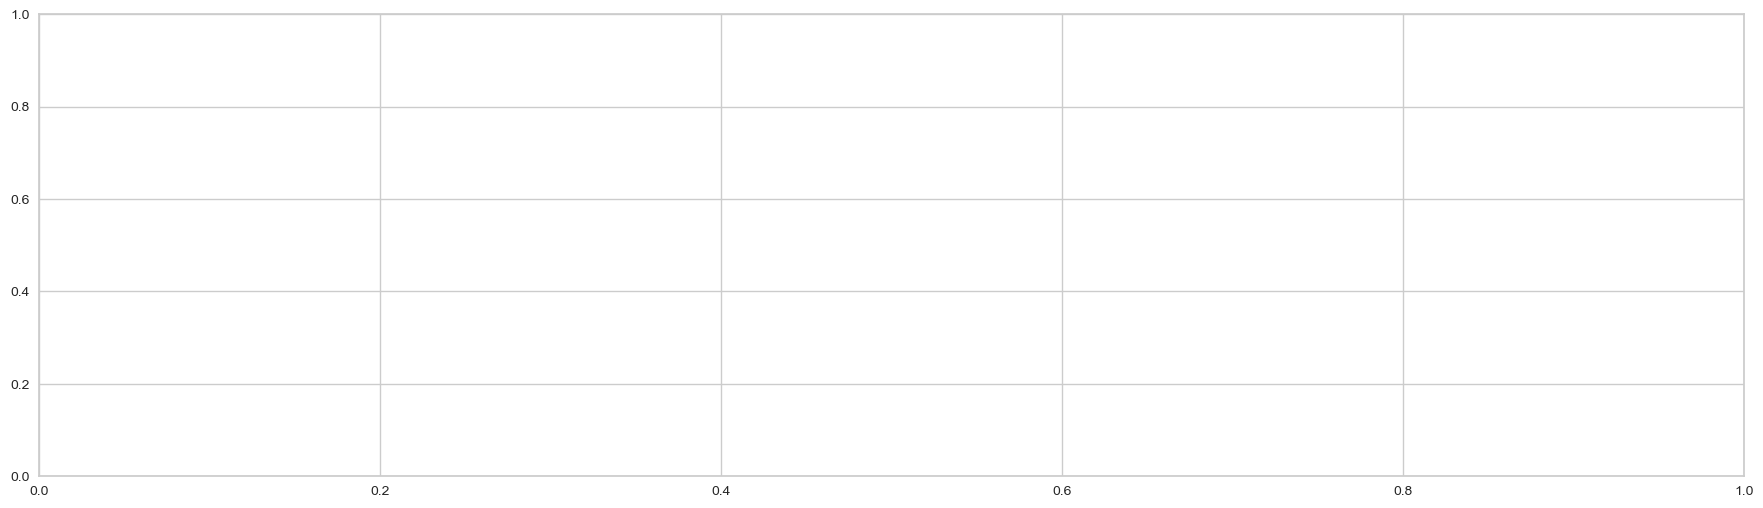

In [18]:
evaluate_model(final_model)

## 7. Save model

In [22]:
 save_model(final_model, 'et_life_expec_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Status',
                                              'Adult Mortality', 'infant deaths',
                                              'Alcohol',
                                              'percentage expenditure',
                                              'Hepatitis B', 'Measles ', ' BMI ',
                                              'under-five deaths ', 'Polio',
                                              'Total expenditure', 'Diphtheria ',
                                              ' HIV/AIDS', 'GDP', 'Population',
                                              ' thinness  1-19 yea...
                                              'Schooling'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[

## 8. Test Final Model on unseen data

In [23]:
loaded_model = load_model('et_life_expec_pycaret')

Transformation Pipeline and Model Successfully Loaded


In [24]:
print(data_unseen.shape)
data_unseen.head()

(146, 21)


,Year,Status,LifeExpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
43,2004,0,72.3,14.0,19,0.45,220.393699,81.0,3289,47.9,23,86.0,3.54,86.0,0.1,2598.982300,3283196.0,6.2,6.1,0.673,11.7
45,2002,0,71.6,145.0,20,0.36,148.511984,NaN,5862,46.1,23,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
60,2003,0,46.8,388.0,95,3.49,35.933491,NaN,1196,16.8,155,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9
85,2010,0,75.5,121.0,10,8.15,187.610955,94.0,17,59.8,11,95.0,6.55,94.0,0.1,1276.265000,41223889.0,1.0,0.9,0.802,16.8
87,2008,0,75.4,126.0,10,8.41,1413.735430,9.0,0,58.6,11,94.0,6.66,93.0,0.1,8953.359275,4382389.0,1.0,0.9,0.792,16.3


In [25]:
unseen_predictions = predict_model(loaded_model, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6804,1.2325,1.1102,0.9862,0.0161,0.0100


,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,LifeExpectancy,prediction_label
43,2004,0,14.0,19,0.45,220.393692,81.0,3289,47.900002,23,86.0,3.54,86.0,0.100000,2598.982422,3283196.0,6.2,6.1,0.673,11.700000,72.300003,72.069000
45,2002,0,145.0,20,0.36,148.511978,NaN,5862,46.099998,23,86.0,3.73,86.0,0.100000,1774.336670,3199546.0,6.3,6.2,0.653,11.100000,71.599998,71.697000
60,2003,0,388.0,95,3.49,35.933491,NaN,1196,16.799999,155,4.0,4.41,4.0,2.400000,779.468384,1823369.0,1.4,1.3,0.406,5.900000,46.799999,47.063999
85,2010,0,121.0,10,8.15,187.610962,94.0,17,59.799999,11,95.0,6.55,94.0,0.100000,1276.265015,41223888.0,1.0,0.9,0.802,16.799999,75.500000,75.952000
87,2008,0,126.0,10,8.41,1413.735474,9.0,0,58.599998,11,94.0,6.66,93.0,0.100000,8953.359375,4382389.0,1.0,0.9,0.792,16.299999,75.400002,75.456000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,2011,0,111.0,0,5.97,417.911743,95.0,0,61.799999,1,95.0,8.55,95.0,0.100000,14166.500000,3385624.0,1.5,1.5,0.780,15.500000,77.000000,76.606001
2832,2009,0,183.0,21,2.56,92.814796,98.0,0,4.000000,24,99.0,6.31,98.0,0.200000,1213.265381,277674.0,3.1,3.1,0.651,11.800000,68.000000,68.511002
2885,2004,0,136.0,29,2.86,0.000000,94.0,217,1.900000,36,96.0,5.90,96.0,0.200000,NaN,NaN,15.4,16.1,0.601,11.000000,74.199997,73.963001
2910,2011,0,366.0,29,2.57,183.046173,81.0,13234,21.200001,44,83.0,4.26,81.0,6.300000,1644.619629,14264756.0,6.6,6.4,0.543,12.000000,58.200001,58.430000
